In [1]:
#loading
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\DELL\\Downloads\\starlink_tle_dataset_csv_type.csv")

print("Dataset loaded successfully")
print("Shape of dataset:", df.shape)
df.head()


Dataset loaded successfully
Shape of dataset: (8147, 10)


,Satellite_Name,Epoch,Inclination_deg,RAAN_deg,Eccentricity,Argument_of_Perigee_deg,Mean_Anomaly_deg,Mean_Motion_rev_per_day,Semi_Major_Axis_km,Orbital_Period_min
0,STARLINK-1008,2025-08-27 13:46:23,53.056645,338.042585,0.000101,87.023974,273.086731,903.851952,6925.561792,1.593181
1,STARLINK-1010,2025-08-27 22:00:02,53.052045,297.375951,0.001228,328.432577,119.007101,943.304479,6731.104067,1.526548
2,STARLINK-1011,2025-08-27 22:00:02,53.055145,349.337095,0.000295,326.623276,111.797794,936.959172,6761.456630,1.536887
3,STARLINK-1012,2025-08-27 13:14:34,53.056245,338.142386,0.000125,85.406272,274.707232,903.847291,6925.585662,1.593189
4,STARLINK-1013,2025-08-27 13:40:41,53.039345,279.299136,0.000700,358.018502,2.082502,969.037299,6611.419189,1.486011


In [3]:
#description
print("\n = Dataset Info ")
print(df.info())

print("\n =  First Rows ")
print(df.head())

print("\n = Summary Statistics ")
print(df.describe())



 = Dataset Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Satellite_Name           8147 non-null   object 
 1   Epoch                    8147 non-null   object 
 2   Inclination_deg          8147 non-null   float64
 3   RAAN_deg                 8147 non-null   float64
 4   Eccentricity             8147 non-null   float64
 5   Argument_of_Perigee_deg  8147 non-null   float64
 6   Mean_Anomaly_deg         8147 non-null   float64
 7   Mean_Motion_rev_per_day  8147 non-null   float64
 8   Semi_Major_Axis_km       8147 non-null   float64
 9   Orbital_Period_min       8147 non-null   float64
dtypes: float64(8), object(2)
memory usage: 636.6+ KB
None

 =  First Rows 
  Satellite_Name                Epoch  Inclination_deg    RAAN_deg  \
0  STARLINK-1008  2025-08-27 13:46:23        53.056645  338.042585   
1  STARLINK

In [4]:
#data cleaning 

#missing values
print("\nMissing values per column:")
print(df.isnull().sum())

#check duplicates
print("\nDuplicate rows:", df.duplicated().sum())

#removing duplicates
df = df.drop_duplicates()

#converting epoch to date time 
df["Epoch"] = pd.to_datetime(df["Epoch"])

print("\nAfter cleaning:")
print(df.info())



Missing values per column:
Satellite_Name             0
Epoch                      0
Inclination_deg            0
RAAN_deg                   0
Eccentricity               0
Argument_of_Perigee_deg    0
Mean_Anomaly_deg           0
Mean_Motion_rev_per_day    0
Semi_Major_Axis_km         0
Orbital_Period_min         0
dtype: int64

Duplicate rows: 0

After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Satellite_Name           8147 non-null   object        
 1   Epoch                    8147 non-null   datetime64[ns]
 2   Inclination_deg          8147 non-null   float64       
 3   RAAN_deg                 8147 non-null   float64       
 4   Eccentricity             8147 non-null   float64       
 5   Argument_of_Perigee_deg  8147 non-null   float64       
 6   Mean_Anomaly_deg         8147 non

In [5]:
#transformation 

#creating numeric epoch (useful for time series ml)
df["Epoch_numeric"] = df["Epoch"].astype("int64") // 10**9

#normalizing numerical features (except Satellite_Name, Epoch)
scaler = MinMaxScaler()
features = df.drop(columns=["Satellite_Name", "Epoch"])
df_scaled = pd.DataFrame(scaler.fit_transform(features), 
                         columns=features.columns)

print("\nNormalized features preview:")
print(df_scaled.head())



Normalized features preview:
   Inclination_deg  RAAN_deg  Eccentricity  Argument_of_Perigee_deg  \
0         0.184305  0.939109      0.026322                 0.238351   
1         0.184221  0.826072      0.327410                 0.915337   
2         0.184278  0.970503      0.078272                 0.910263   
3         0.184298  0.939386      0.032789                 0.233815   
4         0.183989  0.775826      0.186366                 0.998305   

   Mean_Anomaly_deg  Mean_Motion_rev_per_day  Semi_Major_Axis_km  \
0          0.758386                 0.058382            0.942028   
1          0.330032                 0.489800            0.492628   
2          0.309990                 0.420414            0.562774   
3          0.762891                 0.058331            0.942083   
4          0.004972                 0.771192            0.216031   

   Orbital_Period_min  Epoch_numeric  
0            0.936056       0.926852  
1            0.485974       0.969799  
2            0.55

In [6]:
#feature engineering 

#deriving altitude (semi-major axis - Earth radius)
earth_radius = 6371  # km
df["Altitude_km"] = df["Semi_Major_Axis_km"] - earth_radius

# Verify Orbital Period using Mean Motion
df["Orbital_Period_calc"] = 1440 / df["Mean_Motion_rev_per_day"]

print("\nFeature Engineering Results:")
print(df[["Semi_Major_Axis_km","Altitude_km","Orbital_Period_min","Orbital_Period_calc"]].head())



Feature Engineering Results:
   Semi_Major_Axis_km  Altitude_km  Orbital_Period_min  Orbital_Period_calc
0         6925.561792   554.561792            1.593181             1.593181
1         6731.104067   360.104067            1.526548             1.526548
2         6761.456630   390.456630            1.536887             1.536887
3         6925.585662   554.585662            1.593189             1.593189
4         6611.419189   240.419189            1.486011             1.486011


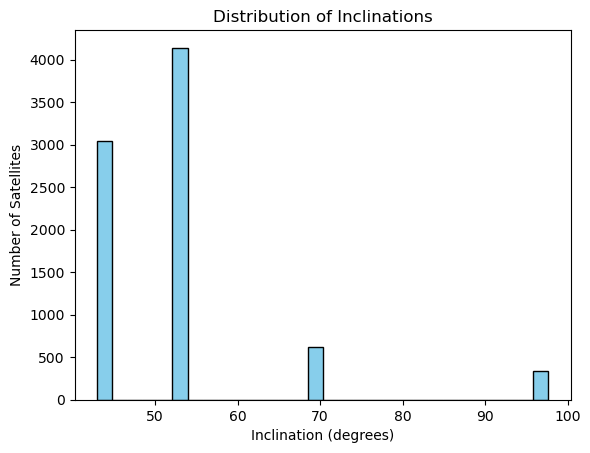

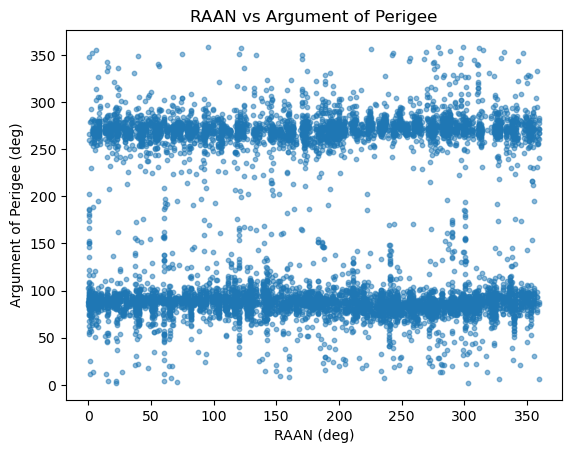

In [7]:
#visualization

#histogram of inclination
plt.hist(df["Inclination_deg"], bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Inclination (degrees)")
plt.ylabel("Number of Satellites")
plt.title("Distribution of Inclinations")
plt.show()

#scatter plot RAAN vs Argument of Perigee
plt.scatter(df["RAAN_deg"], df["Argument_of_Perigee_deg"], s=10, alpha=0.5)
plt.xlabel("RAAN (deg)")
plt.ylabel("Argument of Perigee (deg)")
plt.title("RAAN vs Argument of Perigee")
plt.show()
